## Contour Approximation <br>
reduce the number of points in a curve.<br>
<br>
cv2.approxPolyDP()


Ref: https://en.wikipedia.org/wiki/Ramer%E2%80%93Douglas%E2%80%93Peucker_algorithm

In [1]:
import numpy as np
import imutils
import cv2

import matplotlib.pyplot as plt
%matplotlib inline

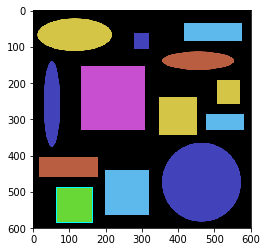

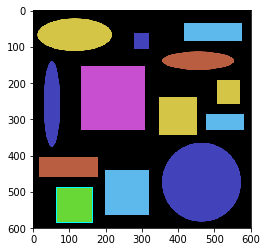

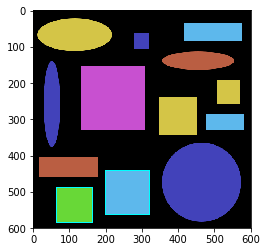

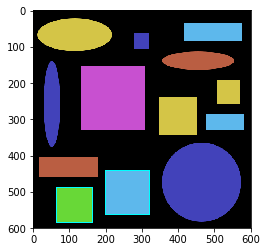

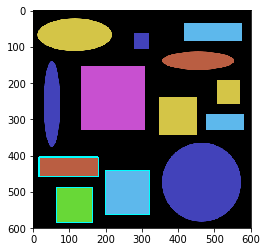

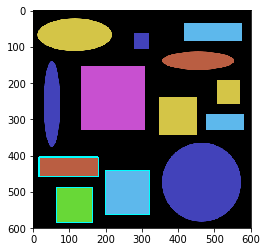

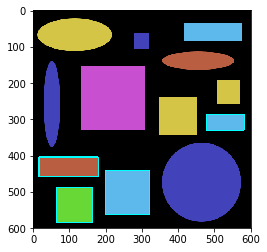

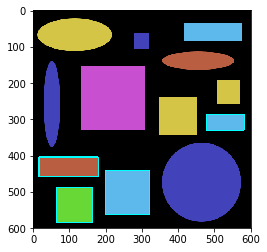

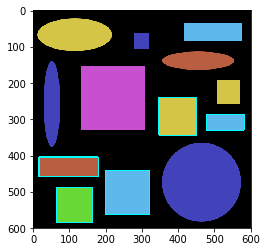

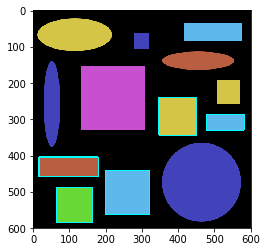

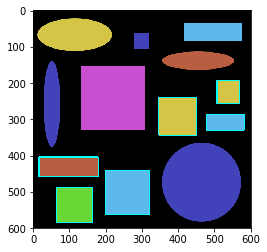

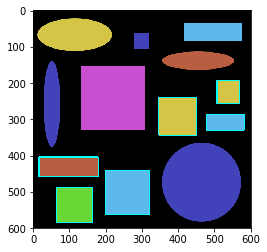

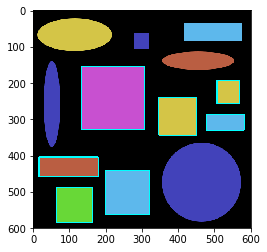

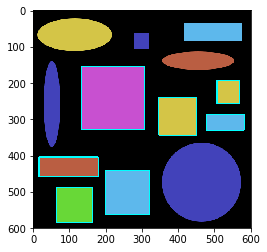

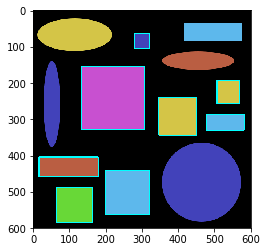

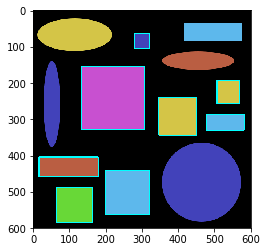

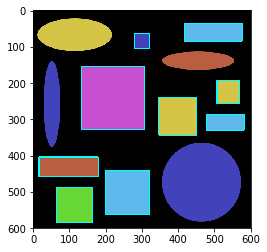

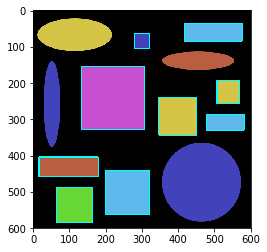

In [2]:

image = cv2.imread("./data/circles_and_squares.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#find contours in the image;
cnts = cv2.findContours( gray.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE )
cnts = imutils.grab_contours(cnts)

# loop over the contours
for c in cnts:
    # approximate the contours
    peri = cv2.arcLength(c, True )
    approx = cv2.approxPolyDP(c, 0.01 * peri, True )
    
    #if the approx contour has 4 vertices, then examining a rectangle
    if len(approx) == 4:
        # draw the outline of the contour and draw the text on the image;
        draw_contours = cv2.drawContours( image, [c], -1, (0,255,255), 2 )
        plt.figure()
        plt.imshow(draw_contours)
        
        #put_text = cv2.putText(image, "Rectangle", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX,0.5, (0, 255, 255), 2)
        #plt.figure()
        #plt.imshow(put_text)
        
        plt.figure()
        plt.imshow(image)

In [3]:
# real world examples

def approx_simple(file):
    image = cv2.imread(file)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY )
    edged = cv2.Canny(gray, 75, 200 )

    plt.figure()
    plt.imshow(gray)
    plt.figure()
    plt.imshow(edged)
    
    #find contours in the image and sort them from largest to smallest;
    # keep only the largest ones;

    cnts = cv2.findContours( edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE )
    cnts = imutils.grab_contours(cnts)
    cnts = sorted( cnts, key=cv2.contourArea, reverse=True)[:7]

    #llop over the contours
    for c in cnts:
        # approx the contour and initialize the contour color
        peri = cv2.arcLength(c, True)
        #cheking for 5% approx
        
        #approx = cv2.approxPolyDP(c, 0.01 * peri, True )
        approx = cv2.approxPolyDP(c, 0.1 * peri, True )

        #show the diff in number of vertices between the original and approx contours
        print("original: {}, approx: {}".format(len(c), len(approx)))

        #if approx contour is 4 then rectangle found
        if len(approx) == 4:
            # draw the outline on the image;
            draw_contour = cv2.drawContours(image, [approx], -1, (0, 255, 0), 2) 
           # plt.figure()
            #plt.imshow(draw_contour)

        plt.figure()
        plt.imshow(image)
        

original: 279, approx: 4
original: 62, approx: 2
original: 41, approx: 2
original: 18, approx: 2
original: 29, approx: 2
original: 31, approx: 2
original: 26, approx: 2


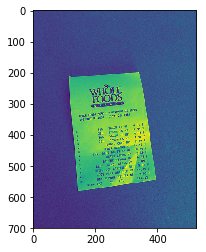

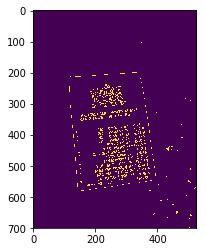

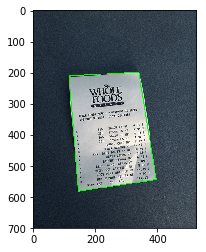

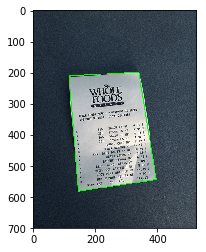

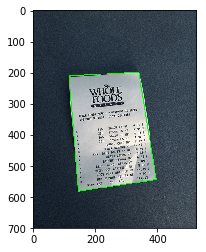

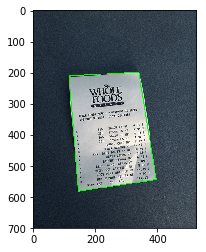

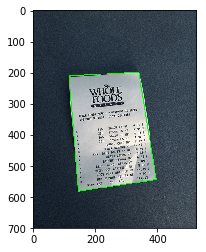

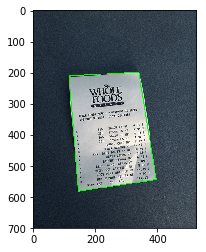

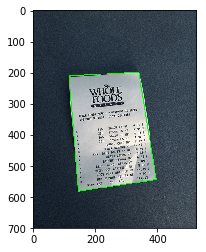

In [4]:
file="./data/receipt.png"
approx_simple(file)

original: 321, approx: 3


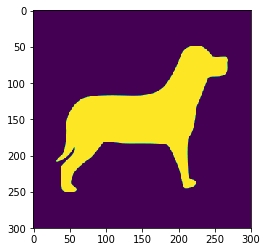

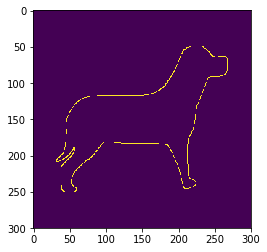

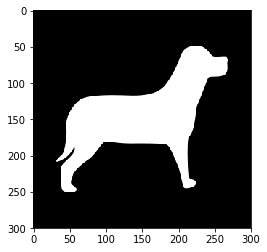

In [5]:
dog_file = "./data/dog_contour.png"
approx_simple(dog_file)

original: 321, approx: 3


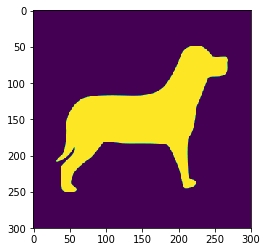

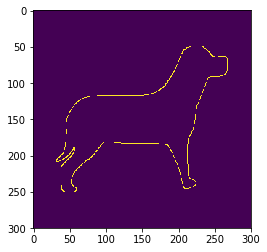

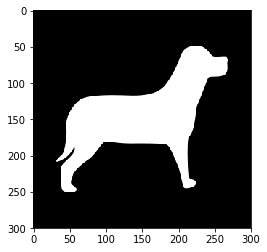

In [6]:
dog_file = "./data/dog_contour.png"
approx_simple(dog_file) # when 5 % approx

original: 321, approx: 3


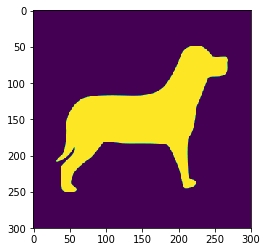

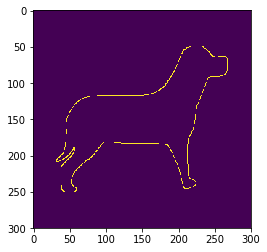

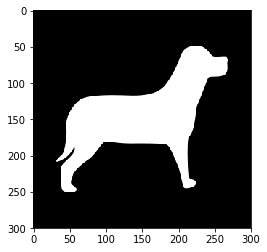

In [7]:
dog_file = "./data/dog_contour.png"
approx_simple(dog_file) # when 10 % approx

Hence, when the percentage of perimeter increases, the number of points in the approx decreases